![Sleep Health and Lifestyle Banner](banner_image.png)

# Sleep Health and Lifestyle

This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, `data.csv`, with the following columns:

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Check out the guiding questions or the scenario described below to get started with this dataset!
Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

### 🌎 **Some guiding questions to help you explore this data:**

1. Which factors could contribute to a sleep disorder?
2. Does an increased physical activity level result in a better quality of sleep?
3. Does the presence of a sleep disorder affect the subjective sleep quality metric?

### 📊 **Visualization ideas**
- Boxplot: show the distribution of sleep duration or quality of sleep for each occupation.
- Show the link between age and sleep duration with a scatterplot. Consider including information on the sleep disorder.

### 🔍 **Scenario: Automatically identify potential sleep disorders**

This scenario helps you develop an end-to-end project for your portfolio.

Background: You work for a health insurance company and are tasked to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

**Objective**: Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.

Check out our [Linear Classifiers course](https://app.datacamp.com/learn/courses/linear-classifiers-in-python) (Python) or [Supervised Learning course](https://app.datacamp.com/learn/courses/supervised-learning-in-r-classification) (R) for a quick introduction to building classifiers.


In [167]:
import pandas as pd

sleep_data = pd.read_csv('data.csv')
sleep_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## **EDA**

In [168]:
sleep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
def categorical_summary(df):
    # Select columns with dtype 'object' or 'category'
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Initialize an empty DataFrame to store the summary
    summary_df = pd.DataFrame(columns=['Unique_Values', 'Value_Counts'])
    
    for col in cat_cols:
        # Count unique values
        unique_count = len(df[col].unique())
        
        # Get value counts as a string
        value_counts_str = df[col].value_counts().to_string()
        
        # Append to the summary DataFrame
        summary_df.loc[col] = [unique_count, value_counts_str]
        
    return summary_df
categorical_summary(sleep_data)

,Unique_Values,Value_Counts
Gender,2,Male 189\nFemale 185
Occupation,11,Nurse 73\nDoctor ...
BMI Category,4,Normal 195\nOverweight 148\nNo...
Blood Pressure,25,130/85 99\n140/95 65\n125/80 65\n120/...
Sleep Disorder,3,None 219\nSleep Apnea 78\nInsomn...


In [171]:
# Combine 'Normal' and 'Normal Weight'
sleep_data['BMI Category'].replace('Normal Weight', 'Normal', inplace=True)
sleep_data['BMI Category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64

In [172]:
sleep_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


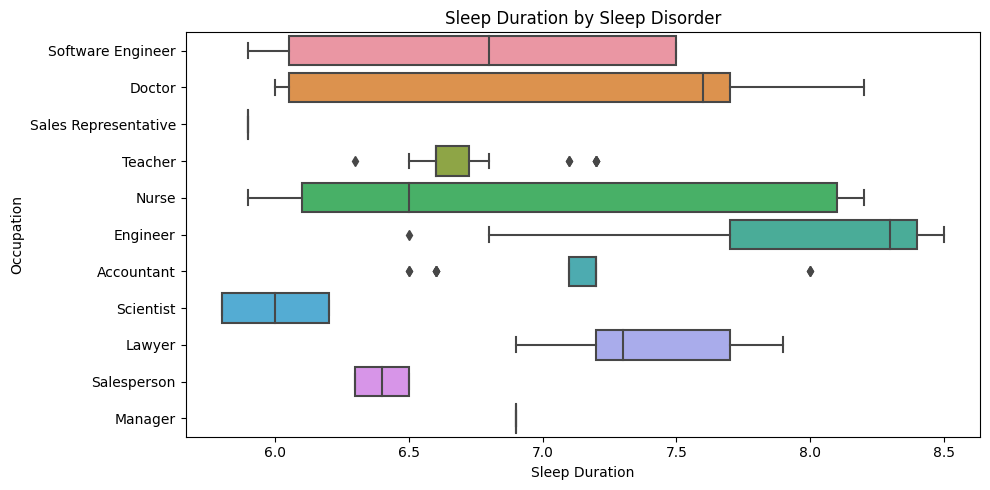

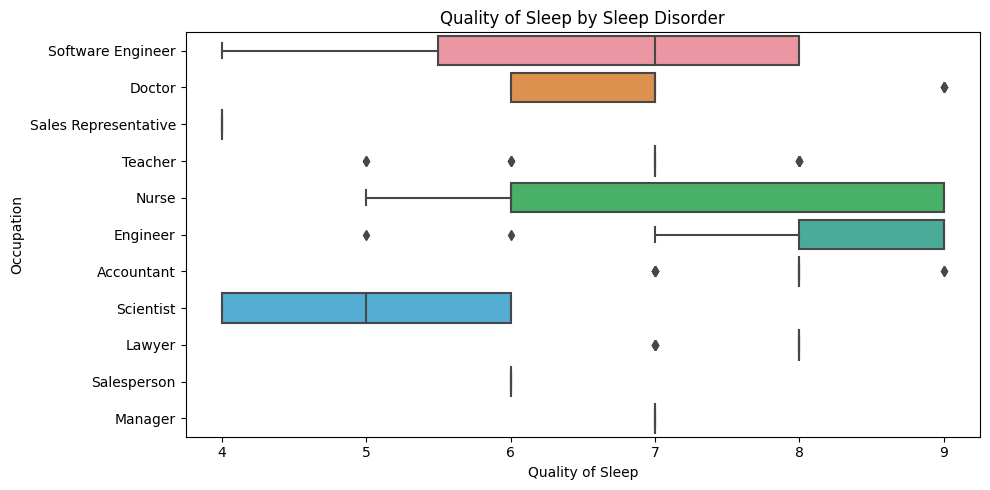

In [173]:
for col in ['Sleep Duration', 'Quality of Sleep']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x= col, y='Occupation', data=sleep_data)
    plt.title(str(col) + ' by Sleep Disorder')
    plt.tight_layout()
    plt.show()

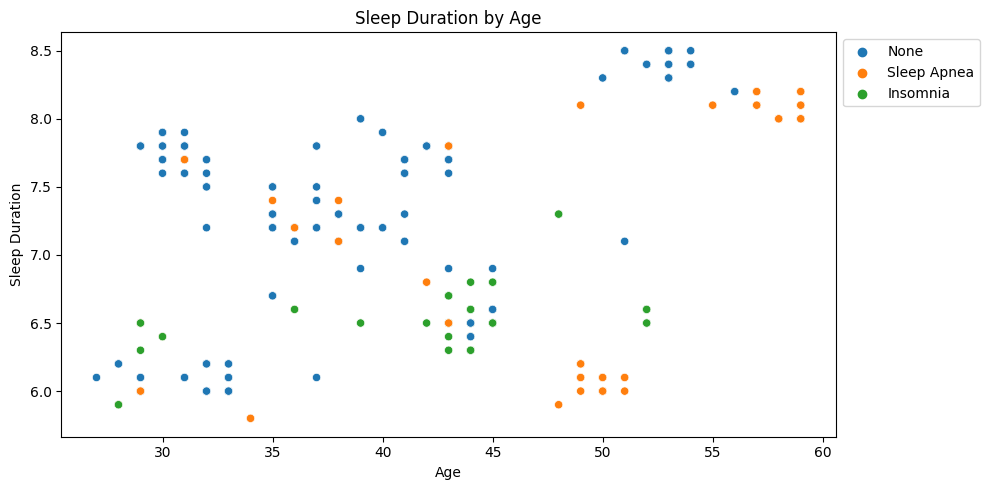

In [174]:
# Scatterplot to visualize Quality of Sleep vs different Sleep Disorders
plt.figure(figsize=(10, 5))
sns.scatterplot(y='Sleep Duration', x='Age', data=sleep_data, hue='Sleep Disorder')
plt.title('Sleep Duration by Age')

# Move the legend outside of the main plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  
plt.show()


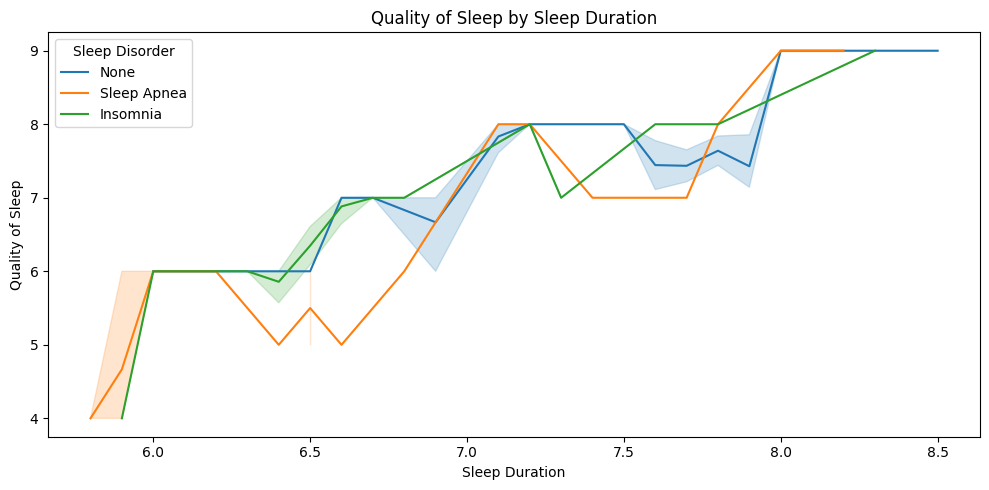

In [175]:
# Quality of Sleep vs Sleep Duration per Sleep Disorder
plt.figure(figsize=(10, 5))
sns.lineplot(x='Sleep Duration', y='Quality of Sleep', data=sleep_data, hue= 'Sleep Disorder')
plt.title('Quality of Sleep by Sleep Duration')
plt.tight_layout()
plt.show()

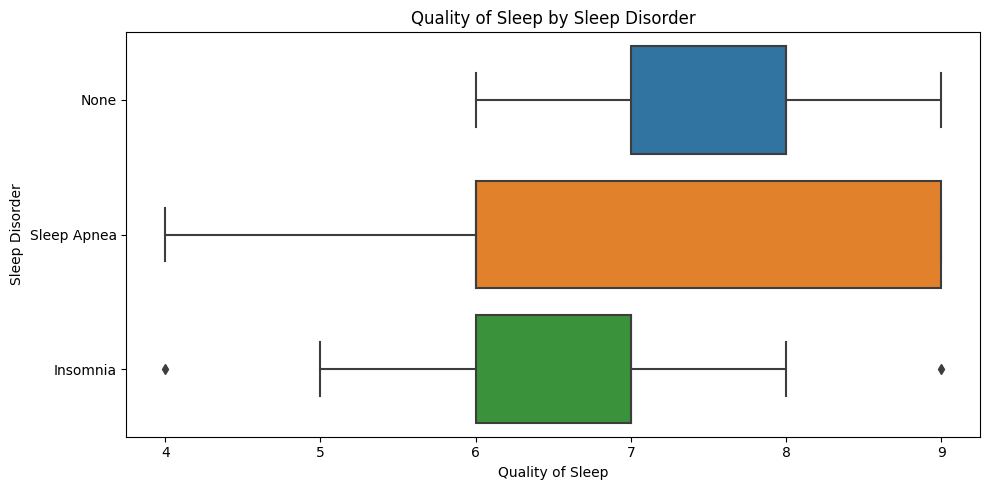

In [176]:
# Boxplot to visualize Quality of Sleep across different Sleep Disorders
plt.figure(figsize=(10, 5))
sns.boxplot(y='Sleep Disorder', x='Quality of Sleep', data=sleep_data)
plt.title('Quality of Sleep by Sleep Disorder')
plt.tight_layout()
plt.show()

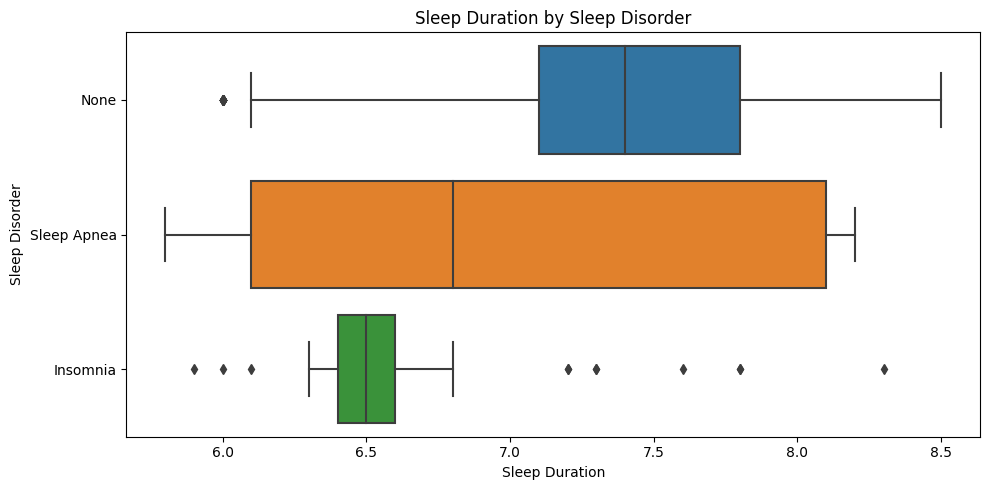

In [177]:
# Boxplot to visualize Sleep Duration across different Sleep Disorders
plt.figure(figsize=(10, 5))
sns.boxplot(y='Sleep Disorder', x='Sleep Duration', data=sleep_data)
plt.title('Sleep Duration by Sleep Disorder')
plt.tight_layout()
plt.show()

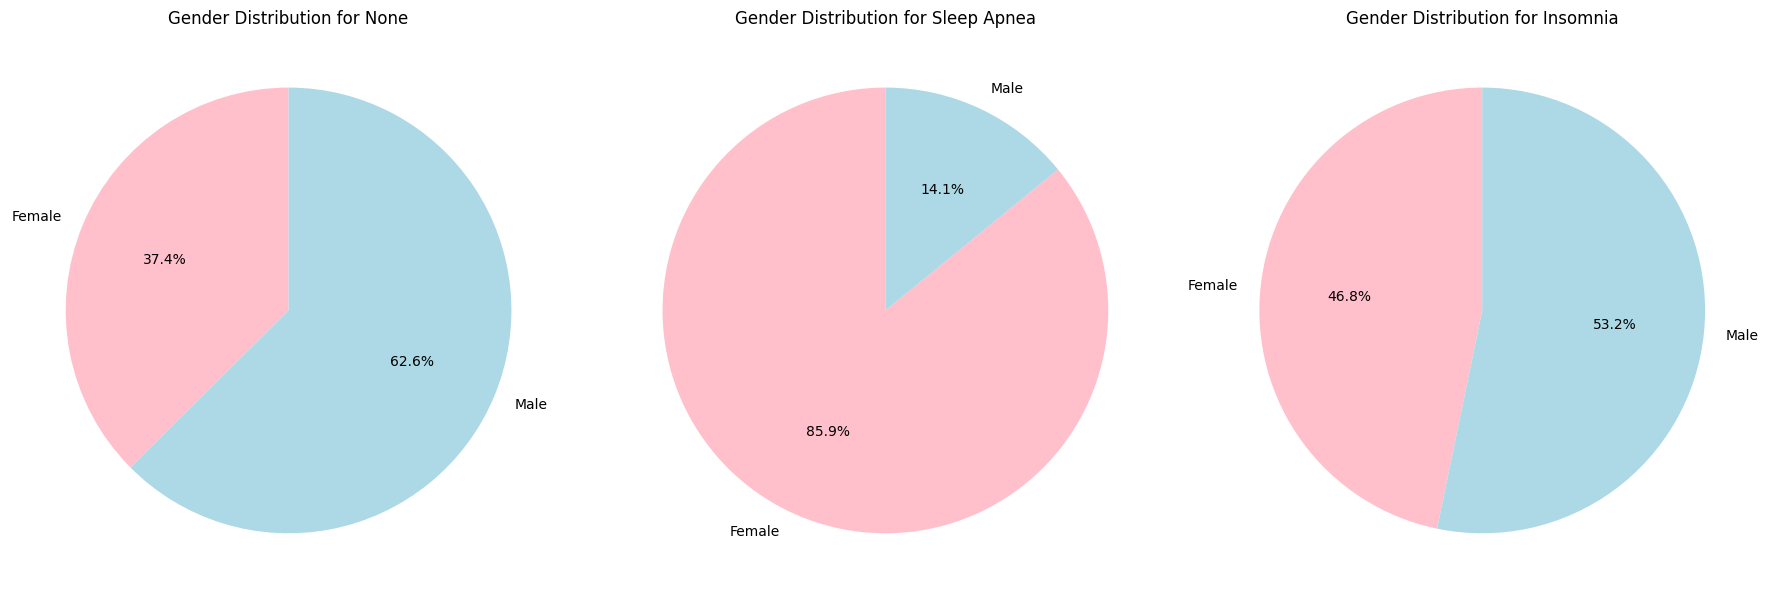

In [178]:
# Define a color map for gender
color_map = {'Male': 'lightblue', 'Female': 'pink'}

# Get unique sleep disorders
unique_disorders = sleep_data['Sleep Disorder'].unique()

# Sort gender labels to maintain consistent ordering
gender_labels = sorted(sleep_data['Gender'].unique())

# Set the number of rows and columns for the subplot grid
n_rows = 1
n_cols = 3  # Adjusted to 3 columns for three subplots

# Initialize the figure
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, 6))  # Adjust the figsize as needed

# Loop through each sleep disorder to create a pie chart
for i, disorder in enumerate(unique_disorders):
    subset_data = sleep_data[sleep_data['Sleep Disorder'] == disorder]
    gender_counts = subset_data['Gender'].value_counts().reindex(gender_labels).fillna(0)
    
    # Define colors based on sorted labels
    colors = [color_map[label] for label in gender_labels]
    
    # Create pie chart in a subplot
    axs[i].pie(gender_counts, labels=gender_labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axs[i].set_title(f'Gender Distribution for {disorder}')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

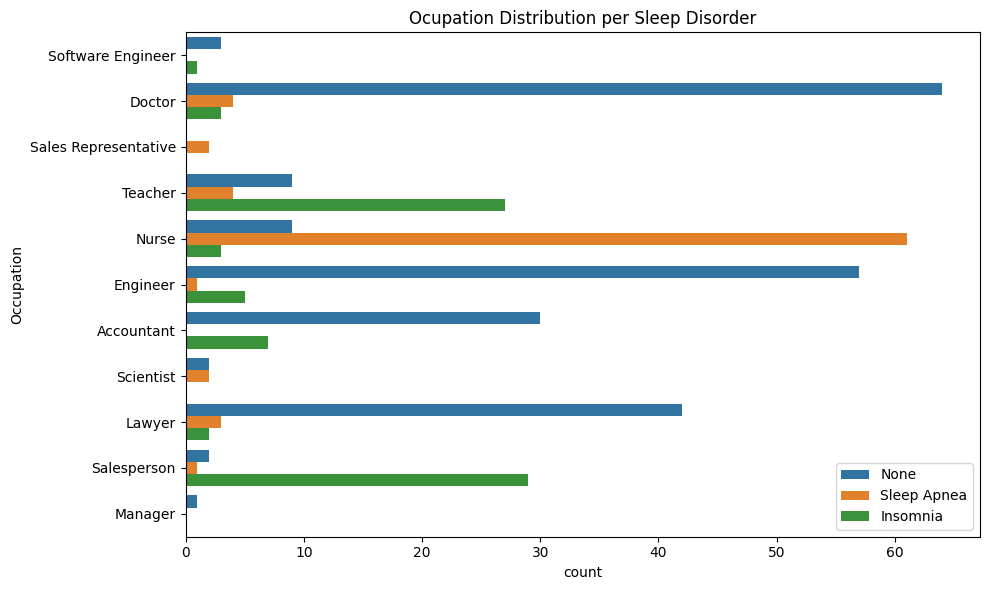

In [179]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(y='Occupation', hue='Sleep Disorder', data=sleep_data)
plt.title('Ocupation Distribution per Sleep Disorder')
plt.legend()
plt.tight_layout()
plt.show()


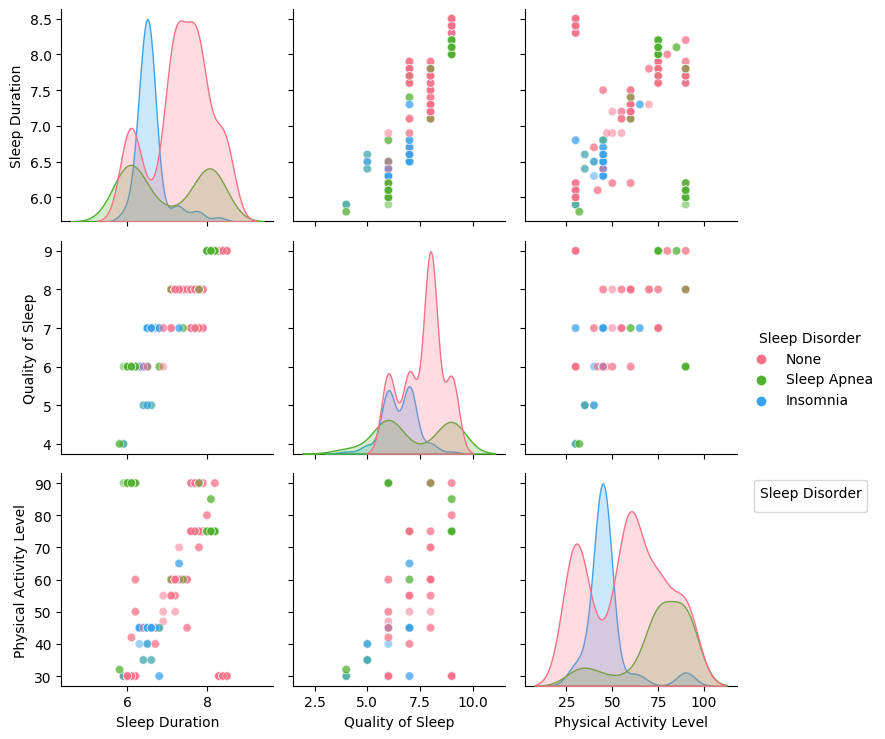

In [180]:
# Create the pairplot
pairplot = sns.pairplot(sleep_data, vars=["Sleep Duration", "Quality of Sleep", "Physical Activity Level"], hue="Sleep Disorder", palette="husl", plot_kws={"alpha": 0.5})

# Move the legend outside of the plot
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

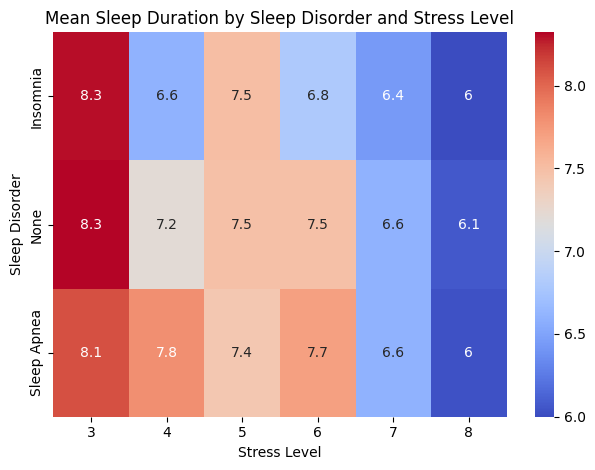

In [181]:
# Create the crosstab
crosstab_data = pd.crosstab(sleep_data["Sleep Disorder"], sleep_data["Stress Level"], 
                            values=sleep_data["Sleep Duration"], aggfunc="mean")

# Create the heatmap
sns.heatmap(crosstab_data, annot=True, cmap='coolwarm')
plt.title('Mean Sleep Duration by Sleep Disorder and Stress Level')
plt.tight_layout()
plt.show()


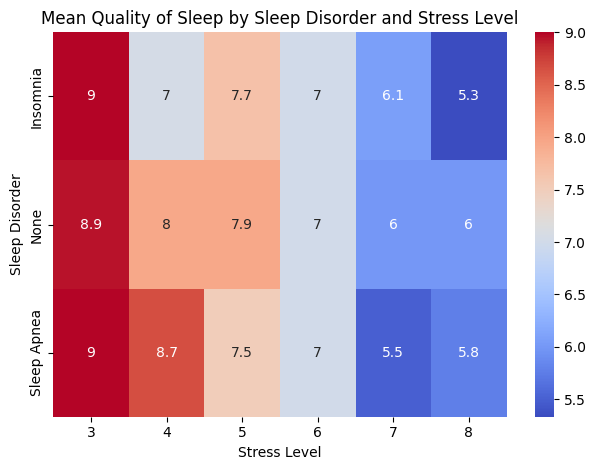

In [182]:
# Create the crosstab
crosstab_data = pd.crosstab(sleep_data["Sleep Disorder"], sleep_data["Stress Level"], 
                            values=sleep_data["Quality of Sleep"], aggfunc="mean")

# Create the heatmap
sns.heatmap(crosstab_data, annot=True, cmap='coolwarm')
plt.title('Mean Quality of Sleep by Sleep Disorder and Stress Level')
plt.tight_layout()
plt.show()

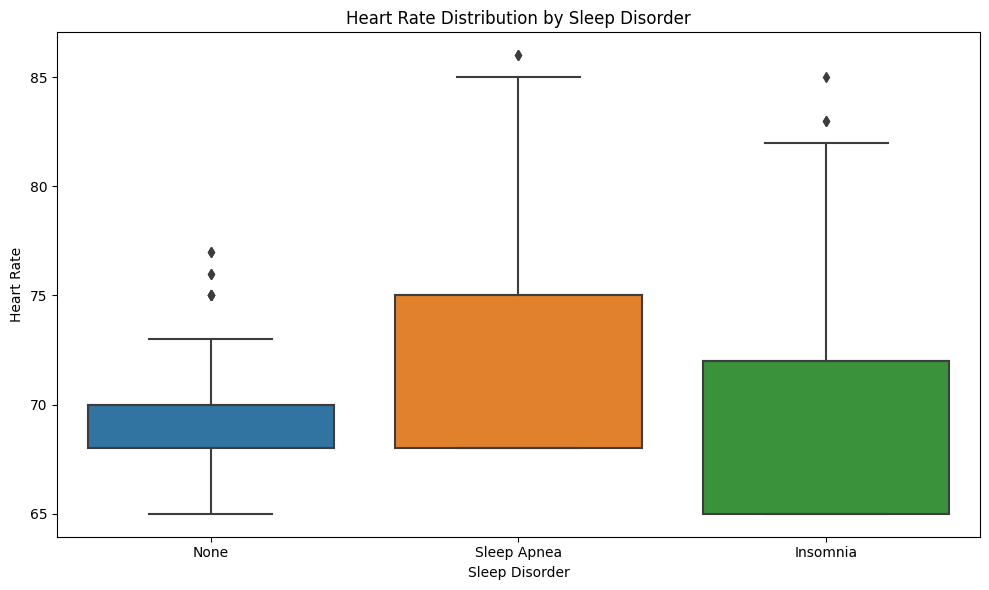

In [183]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sleep Disorder', y='Heart Rate', data=sleep_data)
plt.title('Heart Rate Distribution by Sleep Disorder')
plt.tight_layout()
plt.show()

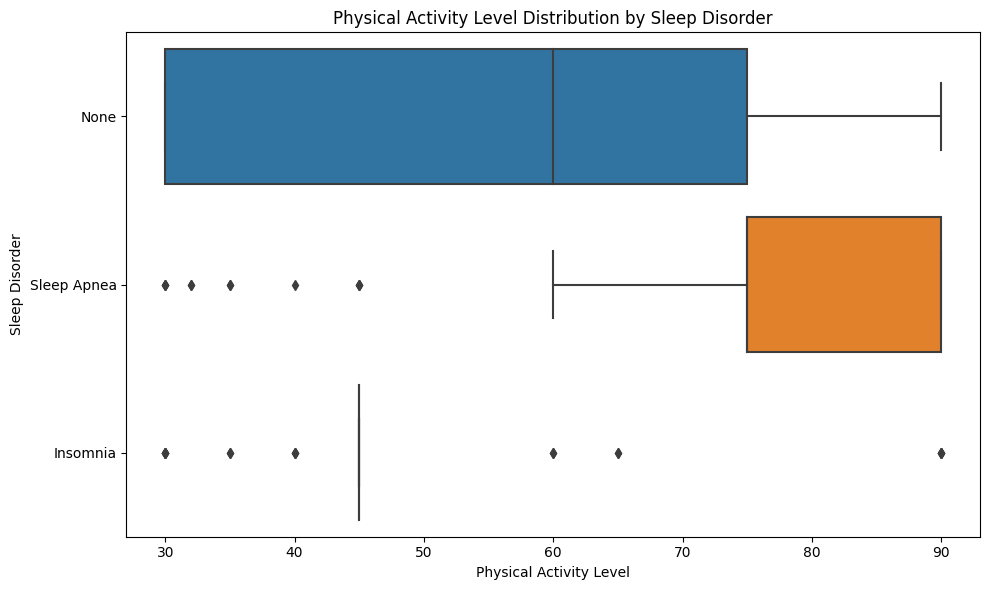

In [184]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Sleep Disorder', x='Physical Activity Level', data=sleep_data)
plt.title('Physical Activity Level Distribution by Sleep Disorder')
plt.tight_layout()
plt.show()

## Features Engineering and Modeling

In [185]:
# Rename the columns
sleep_data.columns = sleep_data.columns.str.lower().str.replace(' ', '_')

# Show the updated column names
print(sleep_data.columns)


In [186]:
sleep_data

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [187]:
# Encoding blood_pressure
sleep_data['bp_ratio'] = [
    float(systolic) / float(diastolic) 
    for systolic, diastolic in sleep_data['blood_pressure'].str.split('/')
]

In [188]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
sleep_data['sleep_disorder'] = le.fit_transform(sleep_data['sleep_disorder'])

In [189]:
# Original and encoded labels
original_labels = sleep_data['sleep_disorder'].apply(lambda x: le.inverse_transform([x])[0])
encoded_labels = sleep_data['sleep_disorder']

label_df = pd.DataFrame({'Original': original_labels, 'Encoded': encoded_labels})

# Drop duplicates to get unique mappings
label_df = label_df.drop_duplicates().sort_values('Encoded')

print(label_df)

      Original  Encoded
5     Insomnia        0
0         None        1
3  Sleep Apnea        2


In [190]:
# Fit and transform the toccupation feature
sleep_data['occupation'] = le.fit_transform(sleep_data['occupation'])

In [191]:
sleep_data

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder,bp_ratio
0,1,Male,27,9,6.1,6,42,6,Overweight,126/83,77,4200,1,1.518072
1,2,Male,28,1,6.2,6,60,8,Normal,125/80,75,10000,1,1.562500
2,3,Male,28,1,6.2,6,60,8,Normal,125/80,75,10000,1,1.562500
3,4,Male,28,6,5.9,4,30,8,Obese,140/90,85,3000,2,1.555556
4,5,Male,28,6,5.9,4,30,8,Obese,140/90,85,3000,2,1.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,5,8.1,9,75,3,Overweight,140/95,68,7000,2,1.473684
370,371,Female,59,5,8.0,9,75,3,Overweight,140/95,68,7000,2,1.473684
371,372,Female,59,5,8.1,9,75,3,Overweight,140/95,68,7000,2,1.473684
372,373,Female,59,5,8.1,9,75,3,Overweight,140/95,68,7000,2,1.473684


In [193]:
features= pd.get_dummies(sleep_data.drop(columns=['person_id', 'blood_pressure','stress_level', 'daily_steps', 'quality_of_sleep']), drop_first= True)
features

,age,occupation,sleep_duration,physical_activity_level,heart_rate,sleep_disorder,bp_ratio,gender_Male,bmi_category_Obese,bmi_category_Overweight
0,27,9,6.1,42,77,1,1.518072,1,0,1
1,28,1,6.2,60,75,1,1.562500,1,0,0
2,28,1,6.2,60,75,1,1.562500,1,0,0
3,28,6,5.9,30,85,2,1.555556,1,1,0
4,28,6,5.9,30,85,2,1.555556,1,1,0
...,...,...,...,...,...,...,...,...,...,...
369,59,5,8.1,75,68,2,1.473684,0,0,1
370,59,5,8.0,75,68,2,1.473684,0,0,1
371,59,5,8.1,75,68,2,1.473684,0,0,1
372,59,5,8.1,75,68,2,1.473684,0,0,1


In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [207]:
# Define your features and target variable
X = features.drop('sleep_disorder', axis=1)  
y = features['sleep_disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  

In [208]:
scaler= StandardScaler()
X_tr_sc= scaler.fit_transform(X_train)
X_test_sc= scaler.transform(X_test)

In [209]:
# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)  

# Fit the model to your training data
dt.fit(X_tr_sc, y_train)

# Use the fitted model to make predictions on the test set
y_pred = dt.predict(X_test_sc)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Accuracy: 92.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       1.00      0.95      0.98        44
           2       0.87      0.81      0.84        16

    accuracy                           0.92        75
   macro avg       0.88      0.90      0.89        75
weighted avg       0.93      0.92      0.92        75



In [214]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=40; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=g

In [215]:
# Initialize Decision Tree Classifier with best parameters
best_dt_model = DecisionTreeClassifier(criterion='entropy', 
                                       max_depth=None, 
                                       min_samples_leaf=1, 
                                       random_state=42,
                                       min_samples_split=10)

# Fit the model to the training data
best_dt_model.fit(X_train, y_train)

# Predictions
y_pred = best_dt_model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       1.00      0.95      0.98        44
           2       0.76      1.00      0.86        16

    accuracy                           0.93        75
   macro avg       0.92      0.92      0.91        75
weighted avg       0.95      0.93      0.94        75



In [212]:
import numpy as np
label_df['Original'].values

array(['Insomnia', 'None', 'Sleep Apnea'], dtype=object)

Confusion Matrix:
[[12  0  3]
 [ 0 42  2]
 [ 0  0 16]]


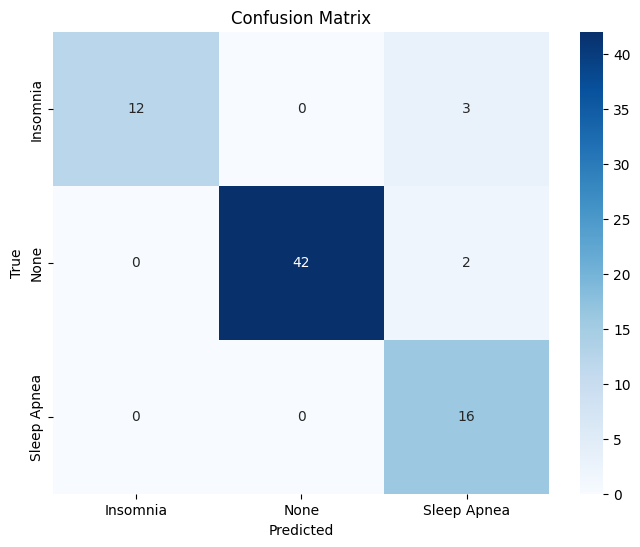

In [213]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_df['Original'].values, yticklabels=label_df['Original'].values)  
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
